In [71]:
'''
Basic example originally from https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

'\nBasic example originally from https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py\n\nTrains a simple deep NN on the MNIST dataset.\n\nGets to 98.40% test accuracy after 20 epochs\n(there is *a lot* of margin for parameter tuning).\n2 seconds per epoch on a K520 GPU.\n'

# FeedForward Network

In [72]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.optimizers import RMSprop
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import numpy as np

## Prepare Data

In [73]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'Total train samples')
print(x_test.shape[0], 'Total test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 Total train samples
10000 Total test samples


## Test Models

In [74]:
def test_model(sample_count):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
#     model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

#     random_indeces = np.arange(len(x_train))
#     np.random.shuffle(random_indeces)
#     x_train = x[random_indeces]
#     y_train = y[random_indeces]

    x_train_small = x_train[:][:sample_count]
    y_train_small = y_train[:][:sample_count]
    print('Training Shape:', x_train_small.shape)

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    training = model.fit(x_train_small, y_train_small,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))


    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    training.history['acc'] = 100.0 * np.array(training.history['acc']) # Convert to percent
    training.history['val_acc'] = 100.0 * np.array(training.history['val_acc']) # Convert to percent
    
    # Start the accuracy at 10% before training started
    training.history['acc'] = np.insert(training.history['acc'], 0, 10.0)
    training.history['val_acc'] = np.insert(training.history['val_acc'], 0, 10.0)
    
    return training

In [75]:
sixty = test_model(60)
six_hundred = test_model(600)
six_thousand = test_model(6000)
sixty_thousand = test_model(60000)

Training Shape: (60, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_51 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60 samples, validate on 10000 samples
Epoch 1/20
60/60 [==============================] - 1s 22ms/step - loss: 2.3617 - acc: 0.1333 - val_loss: 1.9849 - val_acc: 0.3589
Epoch 2/20
60/60 [==============================] - 0s 8ms/step - loss: 1.4414 - acc: 0.6333 - val_loss: 1.7275 - val_acc: 0.5099
Epoch 3/20
60/60 [==============================] - 0s 7ms/step - 

6000/6000 [==============================] - 1s 161us/step - loss: 0.1496 - acc: 0.9550 - val_loss: 0.1880 - val_acc: 0.9421
Epoch 4/20
6000/6000 [==============================] - 1s 210us/step - loss: 0.0983 - acc: 0.9697 - val_loss: 0.2208 - val_acc: 0.9336
Epoch 5/20
6000/6000 [==============================] - 1s 200us/step - loss: 0.0656 - acc: 0.9808 - val_loss: 0.2142 - val_acc: 0.9380
Epoch 6/20
6000/6000 [==============================] - 1s 211us/step - loss: 0.0425 - acc: 0.9873 - val_loss: 0.2112 - val_acc: 0.9421
Epoch 7/20
6000/6000 [==============================] - 1s 177us/step - loss: 0.0351 - acc: 0.9903 - val_loss: 0.2149 - val_acc: 0.9400
Epoch 8/20
6000/6000 [==============================] - 1s 176us/step - loss: 0.0183 - acc: 0.9953 - val_loss: 0.2297 - val_acc: 0.9384
Epoch 9/20
6000/6000 [==============================] - 1s 159us/step - loss: 0.0139 - acc: 0.9953 - val_loss: 0.1951 - val_acc: 0.9533
Epoch 10/20
6000/6000 [==============================] - 1s

## Plotting

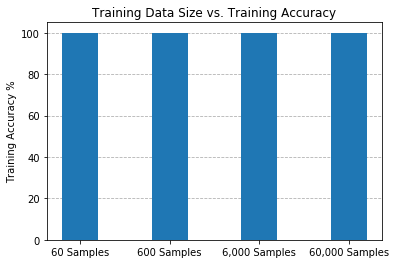

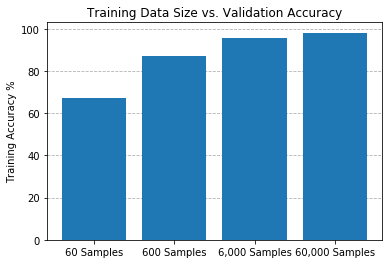

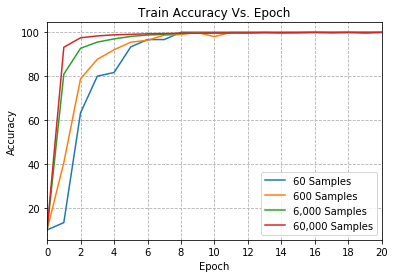

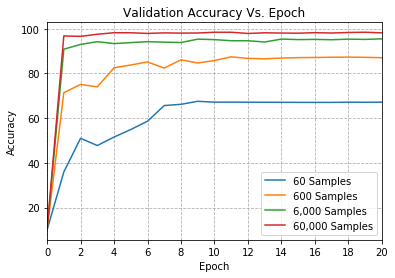

In [118]:
histories = [sixty.history, six_hundred.history, six_thousand.history, sixty_thousand.history]

# Bar Graphs
plt.figure(0)
plt.title('Training Data Size vs. Training Accuracy')
plt.ylabel('Training Accuracy %')
plt.grid(axis='y', linestyle='dashed')
bar_titles = ('60 Samples', '600 Samples', '6,000 Samples', '60,000 Samples')
accuracy = [history['acc'][-1] for history in histories]
x_nums = np.arange(len(bar_titles))
plt.bar(x_nums, accuracy, align='center')

plt.xticks(x_nums, bar_titles)

plt.figure(1)
plt.title('Training Data Size vs. Validation Accuracy')
plt.ylabel('Training Accuracy %')
plt.grid(axis='y', linestyle='dashed')
bar_titles = ('60 Samples', '600 Samples', '6,000 Samples', '60,000 Samples')
accuracy = [history['val_acc'][-1] for history in histories]
x_nums = np.arange(len(bar_titles))
plt.bar(x_nums, accuracy, align='center')
plt.xticks(x_nums, bar_titles)

# Line graphs
x_data = np.arange(0, epochs+1)

plt.figure(2)
plt.title("Train Accuracy Vs. Epoch")
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
plt.grid(linestyle='dashed')
plt.xlim(1, epochs)
plt.xticks(np.arange(0, epochs+1, step=2.0))
for history in histories:
    plt.plot(x_data, history['acc'])
plt.legend(['60 Samples', '600 Samples', '6,000 Samples', '60,000 Samples'], loc='lower right') 

plt.figure(3)
plt.title("Validation Accuracy Vs. Epoch")
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
plt.grid(linestyle='dashed')
plt.xlim(1, epochs)
plt.xticks(np.arange(0, epochs+1, step=2.0))
for history in histories:
    plt.plot(x_data, history['val_acc']) 
plt.legend(['60 Samples', '600 Samples', '6,000 Samples', '60,000 Samples'], loc='lower right') 